[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Available Categories: ['Network' 'IT Sector' 'Health Care' 'Real Estate' 'Industrials']
Enter Category Name: Network
Available Symbols: ['BHARTIARTL' 'IDEA' 'JIOFIN']
Enter Symbol Name 1: BHARTIARTL
Enter Symbol Name 2: IDEA


C:\Users\Sahil bopche\AppData\Local\Temp\ipykernel_15064\3467594061.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(stk1['Date'], rotation=90)
C:\Users\Sahil bopche\AppData\Local\Temp\ipykernel_15064\3467594061.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(stk2['Date'], rotation=90)


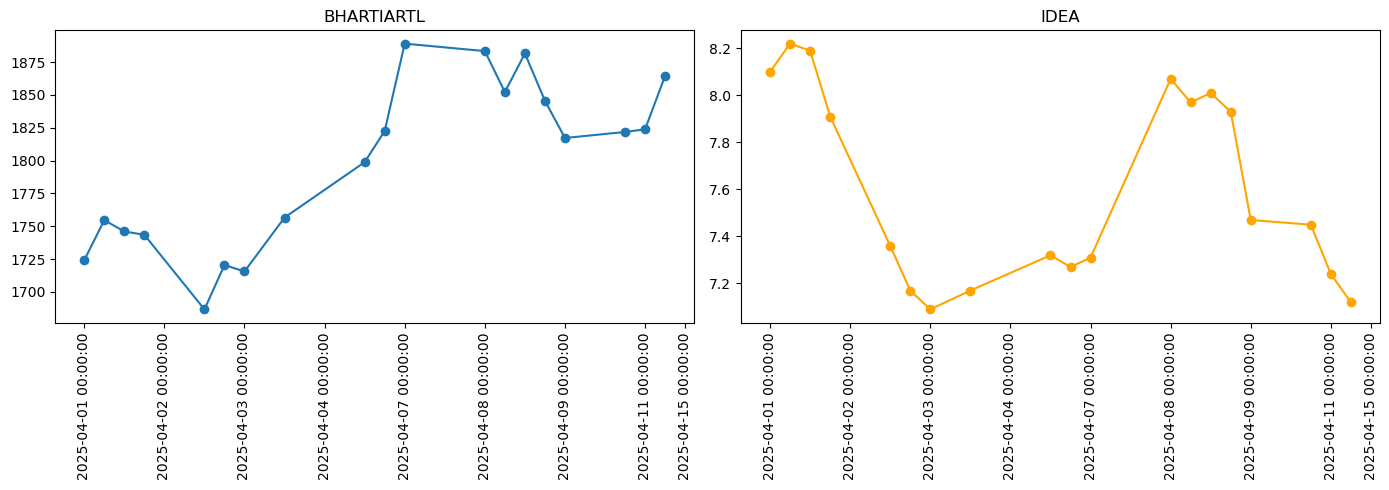

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import yfinance as yf
import datetime as d

# Define date range
s = d.datetime(2025, 4, 1)
e = d.datetime(2025, 5, 1)

# Stock symbols by category
stocks = {
    'Network': ['BHARTIARTL.NS', 'IDEA.NS', 'JIOFIN.NS'],
    'IT Sector': ['TCS.NS', 'INFY.NS', 'WIPRO.NS'],
    'Health Care': ['SUNPHARMA.NS', 'DRREDDY.NS', 'CIPLA.NS', 'LUPIN.NS', 'AUROPHARMA.NS'],
    'Real Estate': ['DLF.NS', 'GODREJPROP.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS', 'PRESTIGE.NS'],
    'Industrials': ['L&T.NS', 'BHEL.NS', 'SIEMENS.NS', 'ABB.NS', 'HAVELLS.NS']
}

# Download and prepare data
all_data = []
for category, symbols in stocks.items():
    for symbol in symbols:
        try:
            data = yf.download(symbol, start=s, end=e)
            data['Symbol'] = symbol.split('.')[0]
            data['Category'] = category
            all_data.append(data)
        except Exception as ex:
            print(f"Error downloading {symbol}: {ex}")

# Combine all stock data
df = pd.concat(all_data)
df = df.reset_index()

# Rename index to Date if necessary
if 'Date' not in df.columns:
    df.rename(columns={'index': 'Date'}, inplace=True)

# User input for category and symbols
print("Available Categories:", df['Category'].unique())
a = input("Enter Category Name: ")
cate = df[df['Category'] == a]

print("Available Symbols:", cate['Symbol'].unique())
st1 = input("Enter Symbol Name 1: ")
st2 = input("Enter Symbol Name 2: ")

stk1 = cate[cate['Symbol'] == st1]
stk2 = cate[cate['Symbol'] == st2]

# Plot closing prices for the selected stocks
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(stk1['Date'], stk1['Close'], marker='o')
axs[0].set_title(st1)
axs[0].set_xticklabels(stk1['Date'], rotation=90)

axs[1].plot(stk2['Date'], stk2['Close'], marker='o', color='orange')
axs[1].set_title(st2)
axs[1].set_xticklabels(stk2['Date'], rotation=90)

plt.tight_layout()
plt.show()
